In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft
import pandas as pd
import glob
import sipm.util.functions as func
from datetime import datetime
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
!pwd

/home/as111/sipm-analysis


In [3]:
# data folder
path = "/scratch/gpfs/as111/results/2023-12-13"
data_spe = {}
channels = np.arange(8)
volt = 98
for ch in channels:
    data_spe[ch] = {'n_spe_wfs':0, 'avg_spe_wf':np.zeros(0), 'time':np.zeros(0)}
    files = glob.glob(f"{path}/*volt_{volt}*laser_waveform_liq5.h5")
    print(files)
    for f in files:
        df = pd.read_hdf(f, key=f'{volt}/{ch}')
        data_spe[ch]['n_spe_wfs'] += np.array(df['n_spe_wfs'])[0]
        if data_spe[ch]['time'].shape[0]==0:
            data_spe[ch]['time'] = np.array(df['time'])
        if np.array(df['n_spe_wfs'])[0]>0:
            if data_spe[ch]['avg_spe_wf'].shape[0]==0:
                data_spe[ch]['avg_spe_wf'] = np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
            else:
                data_spe[ch]['avg_spe_wf'] += np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
    df = None
    if data_spe[ch]['n_spe_wfs']>0:
        data_spe[ch]['avg_spe_wf'] /= data_spe[ch]['n_spe_wfs']

['/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run0_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run5_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run3_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run4_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run8_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run2_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run9_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run6_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run1_laser_waveform_liq5.h5', '/scratch/gpfs/as1

ch0 98V 52299 waveforms selected
ch1 98V 81432 waveforms selected
ch2 98V 71748 waveforms selected
ch3 98V 93174 waveforms selected
ch4 98V 97203 waveforms selected
ch5 98V 80366 waveforms selected
ch6 98V 35761 waveforms selected
ch7 98V 30428 waveforms selected


Text(0.07, 0.5, 'Amplitude (ADC Unit)')

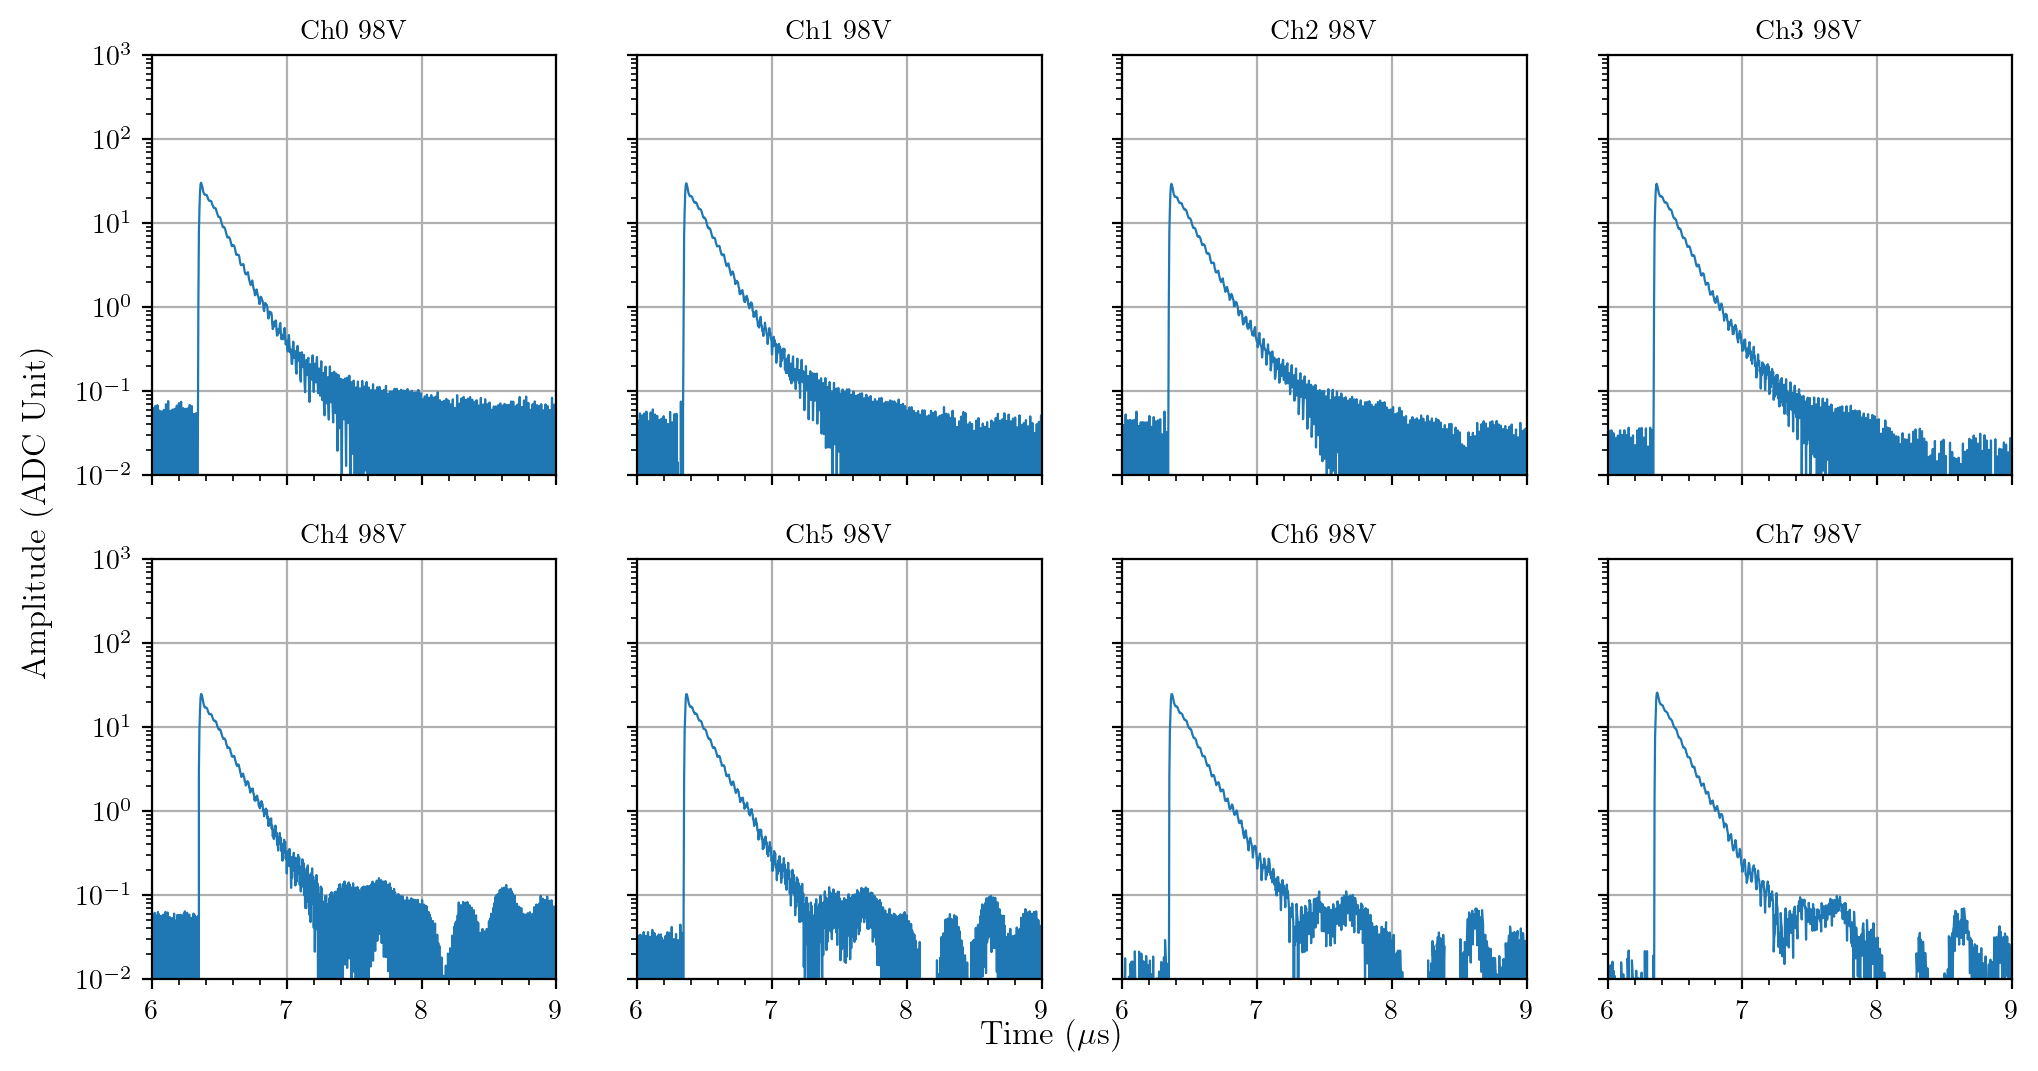

In [4]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    if data_spe[ch]['n_spe_wfs']>0:
        print(f'ch{ch} {volt}V {data_spe[ch]["n_spe_wfs"]:.0f} waveforms selected')
        axs[j//4, j%4].plot(
            data_spe[ch]['time'],
            data_spe[ch]['avg_spe_wf'],linewidth=0.8)
    axs[j//4, j%4].set_xlim(6, 9)
    axs[j//4, j%4].set_ylim(1e-2, 1e3)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch} {volt}V')
fig.supxlabel(r'Time ($\mu$s)', y=0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## FFT

Text(0.07, 0.5, 'FFT Abs. Amplitude (ADC Unit)')

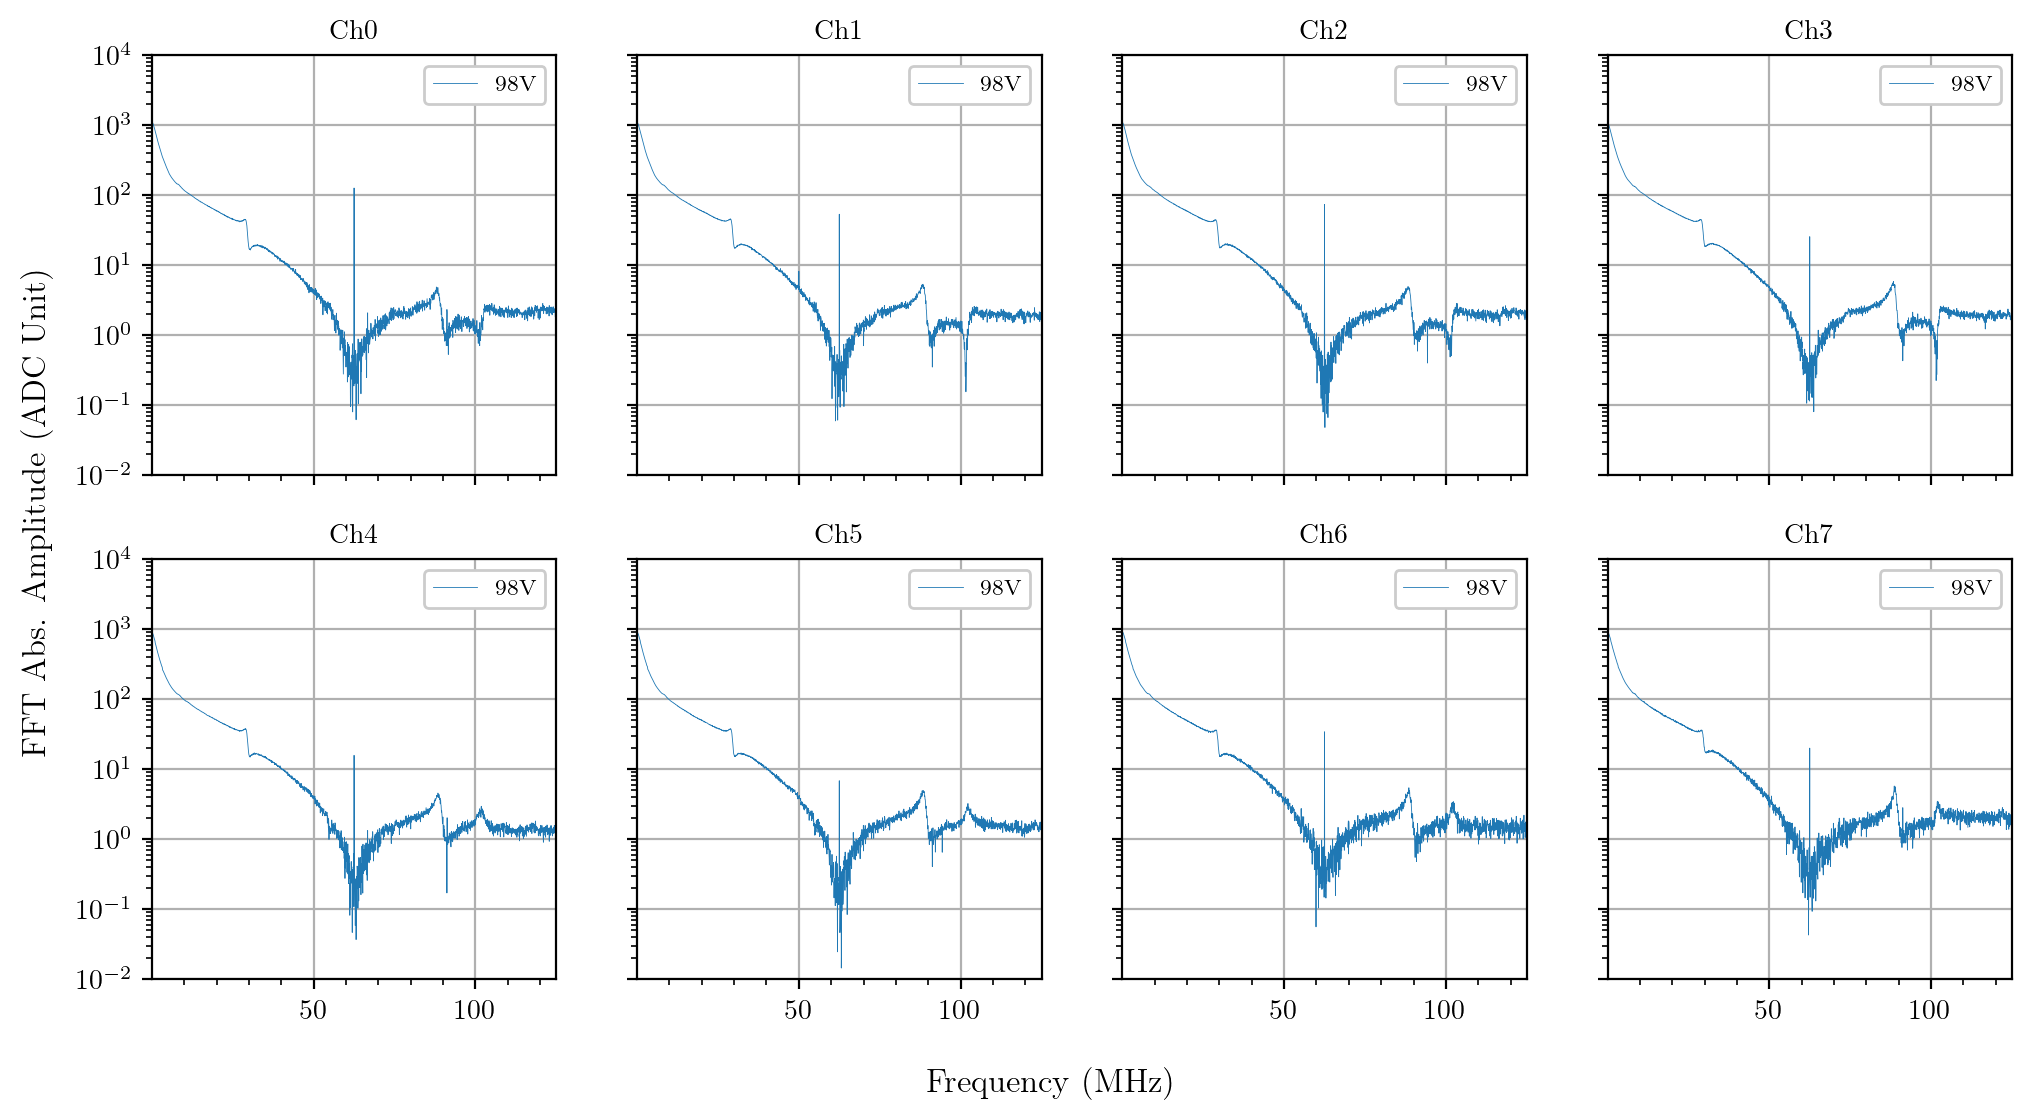

In [5]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    data_spe[ch]['fft_spe_wf'] = fft(data_spe[ch]['avg_spe_wf'])
    dt = data_spe[ch]['time'][1]-data_spe[ch]['time'][0]
    t_total = dt+data_spe[ch]['time'][-1]
    n_over_2 = int(data_spe[ch]['time'].shape[0]/2)
    data_spe[ch]['frequency'] = data_spe[ch]['time']/dt/t_total
    axs[j//4, j%4].plot(
        data_spe[ch]['frequency'][:n_over_2],
        abs(data_spe[ch]['fft_spe_wf'][:n_over_2]),
        label=f'{volt}V', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right')
    axs[j//4, j%4].set_xlim(data_spe[ch]['frequency'][1], data_spe[ch]['frequency'][n_over_2])
    axs[j//4, j%4].set_ylim(1e-2, 1e4)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Frequency (MHz)', y=0.01)
fig.supylabel(r'FFT Abs. Amplitude (ADC Unit)', x=0.07)

# Fit: exponential pulses with time jitter
Scintillation pulse (one component):
$$h(t,t') = A e^{-\frac{t-t'}{\tau}} \Theta(t-t')$$
Time jitter:
$$g(t') = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(t'-t_0)^2}{2\sigma^2}}$$
Average waveform:
$$
f(t,t') = \int g(t') h(t,t') \, dt'
= \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{(t'-t_0)^2}{2\sigma^2}-\frac{t-t'}{\tau}} \, dt'$$

$$ = \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t^{'2} - 2t'(t_0 + \sigma^2/\tau) + t_0^2 + 2\sigma^2 t_0/\tau + \sigma^4 /\tau^2 + 2\sigma^2 (t-t_0)/\tau - \sigma^4/\tau^2]} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sigma\sqrt{2\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t'-(t_0 + \sigma^2/\tau)]^2} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sqrt{\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t/\sigma\sqrt{2}} e^{-[x'-\frac{t_0 + \sigma^2/\tau}{\sigma\sqrt{2}}]^2} \, dx'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{2} e^{-\frac{t-t_0}{\tau}} \left[1 + erf\left(\frac{t-t_0-\sigma^2/\tau}{\sigma\sqrt{2}}\right)\right]
$$
We include two scintillation pulse components with distinct $\tau$.

In [6]:
def template(t, a_1, tau_1, sigma, t0):
        return func.pulse_jitter(t, a_1, tau_1, sigma, t0)

In [7]:
# Fit SPE average waveform
for j, ch in enumerate(channels):
    pretrg = 5 #us
    err = np.std(data_spe[ch]['avg_spe_wf'][data_spe[ch]['time']<pretrg])
    fit_range = [6.2,7.5] #us
    range_arr = (data_spe[ch]['time']<fit_range[1])&(data_spe[ch]['time']>fit_range[0])
    # print(pos,ch,volt)
    # print(data_spe[pos][ch][volt]['time'][range_arr])
    # print(data_spe[pos][ch][volt]['avg_spe_wf'][range_arr])
    popt,pcov = curve_fit(
        template,
        data_spe[ch]['time'][range_arr], 
        data_spe[ch]['avg_spe_wf'][range_arr], 
        p0=[20, 0.15, 0.005, 6.35], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
    data_spe[ch]['pars'] = popt
    data_spe[ch]['cov'] = pcov
    print(popt)

[3.09978444e+01 1.44186287e-01 4.98543328e-03 6.35198728e+00]
[2.98576818e+01 1.45897283e-01 4.78143251e-03 6.35198606e+00]
[2.91092843e+01 1.49812852e-01 4.69644096e-03 6.35153502e+00]
[2.95886277e+01 1.45414900e-01 4.76844381e-03 6.35163753e+00]
[2.44756170e+01 1.46659801e-01 4.63745825e-03 6.35366751e+00]
[2.48016769e+01 1.45701012e-01 4.71951053e-03 6.35401420e+00]
[2.51048752e+01 1.45447319e-01 4.83536352e-03 6.35419334e+00]
[2.63450992e+01 1.39803756e-01 4.89159142e-03 6.35524434e+00]


# Triplet lifetime
Here the average waveforms are deconvolved channel-by-channel using their respective SPE pulse shapes.
The deconvolved waveform is given by
$$f_{deconv}(t) = \mathcal{F}^{-1}\left(\frac{\mathcal{F}(f_{original}(t))}{\mathcal{F}(f_{SiPM}(t))}\right)$$
Note that the SiPM pulse shape has to be shifted such that the trigger for it is at $t=0$.<br>

The average waveforms are selected from the events with $0.1<F_{\rm prompt}<0.5$ and $20<N_{\rm PE}<200$ ($100<N_{\rm PE}<1000$) for the top (bottom), corresponding to an energy range of $100$ keV $\lesssim E \lesssim 1000$ keV

In [8]:
path = "/scratch/gpfs/as111/results/"
dates = ['2024-02-16','2024-02-19','2024-02-21']
files = []
for d in dates:
    files.extend(glob.glob(f"{path}{d}/*scintillation_waveform_liq6.h5"))
print(files)
print(len(files))

['/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run7_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run5_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run1_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run0_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run2_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run8_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run10_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run3_scintil

In [9]:
# data folder
data_scint = {}
date_time = {}
channels = np.arange(8)
volt = 98
for f in files:
    data_scint[f] = {}
    df = pd.read_hdf(f, key=f'{volt}/-1')
    date_time[f] = datetime(*np.array(df['start_datetime'][:6]).astype(int))
    for ch in channels:
        data_scint[f][ch] = {'n_scint_wfs':0, 'avg_scint_wf':np.zeros(0), 'time':np.zeros(0)}
        df = pd.read_hdf(f, key=f'{volt}/{ch}')
        data_scint[f][ch]['n_scint_wfs'] += np.array(df['n_scint_wfs'])[0]
        if data_scint[f][ch]['time'].shape[0]==0:
            data_scint[f][ch]['time'] = np.array(df['time'].dropna())
        if data_scint[f][ch]['avg_scint_wf'].shape[0]==0:
            data_scint[f][ch]['avg_scint_wf'] = np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
        else:
            data_scint[f][ch]['avg_scint_wf'] += np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
        df = None
        data_scint[f][ch]['avg_scint_wf'] /= data_scint[f][ch]['n_scint_wfs']
# sort according to date time
args = np.array(list(date_time.values())).argsort()
files = np.array(files)[args]

2024-02-16 15:01:09 ch0 4558 waveforms selected
2024-02-16 18:03:58 ch0 4598 waveforms selected
2024-02-16 21:06:44 ch0 4614 waveforms selected
2024-02-17 00:09:30 ch0 4464 waveforms selected
2024-02-17 03:12:20 ch0 4534 waveforms selected
2024-02-17 06:15:04 ch0 4655 waveforms selected
2024-02-17 09:17:55 ch0 4554 waveforms selected
2024-02-17 12:20:35 ch0 4590 waveforms selected
2024-02-17 15:23:17 ch0 4693 waveforms selected
2024-02-17 18:26:01 ch0 4675 waveforms selected
2024-02-17 21:28:51 ch0 4637 waveforms selected
2024-02-18 00:31:36 ch0 4683 waveforms selected
2024-02-19 13:50:52 ch0 4773 waveforms selected
2024-02-19 16:53:38 ch0 4867 waveforms selected
2024-02-19 19:56:19 ch0 4807 waveforms selected
2024-02-19 22:59:08 ch0 4701 waveforms selected
2024-02-20 02:02:00 ch0 4724 waveforms selected
2024-02-20 05:04:43 ch0 4812 waveforms selected
2024-02-20 08:07:25 ch0 4685 waveforms selected
2024-02-20 11:10:08 ch0 4782 waveforms selected
2024-02-20 14:12:55 ch0 4823 waveforms s

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

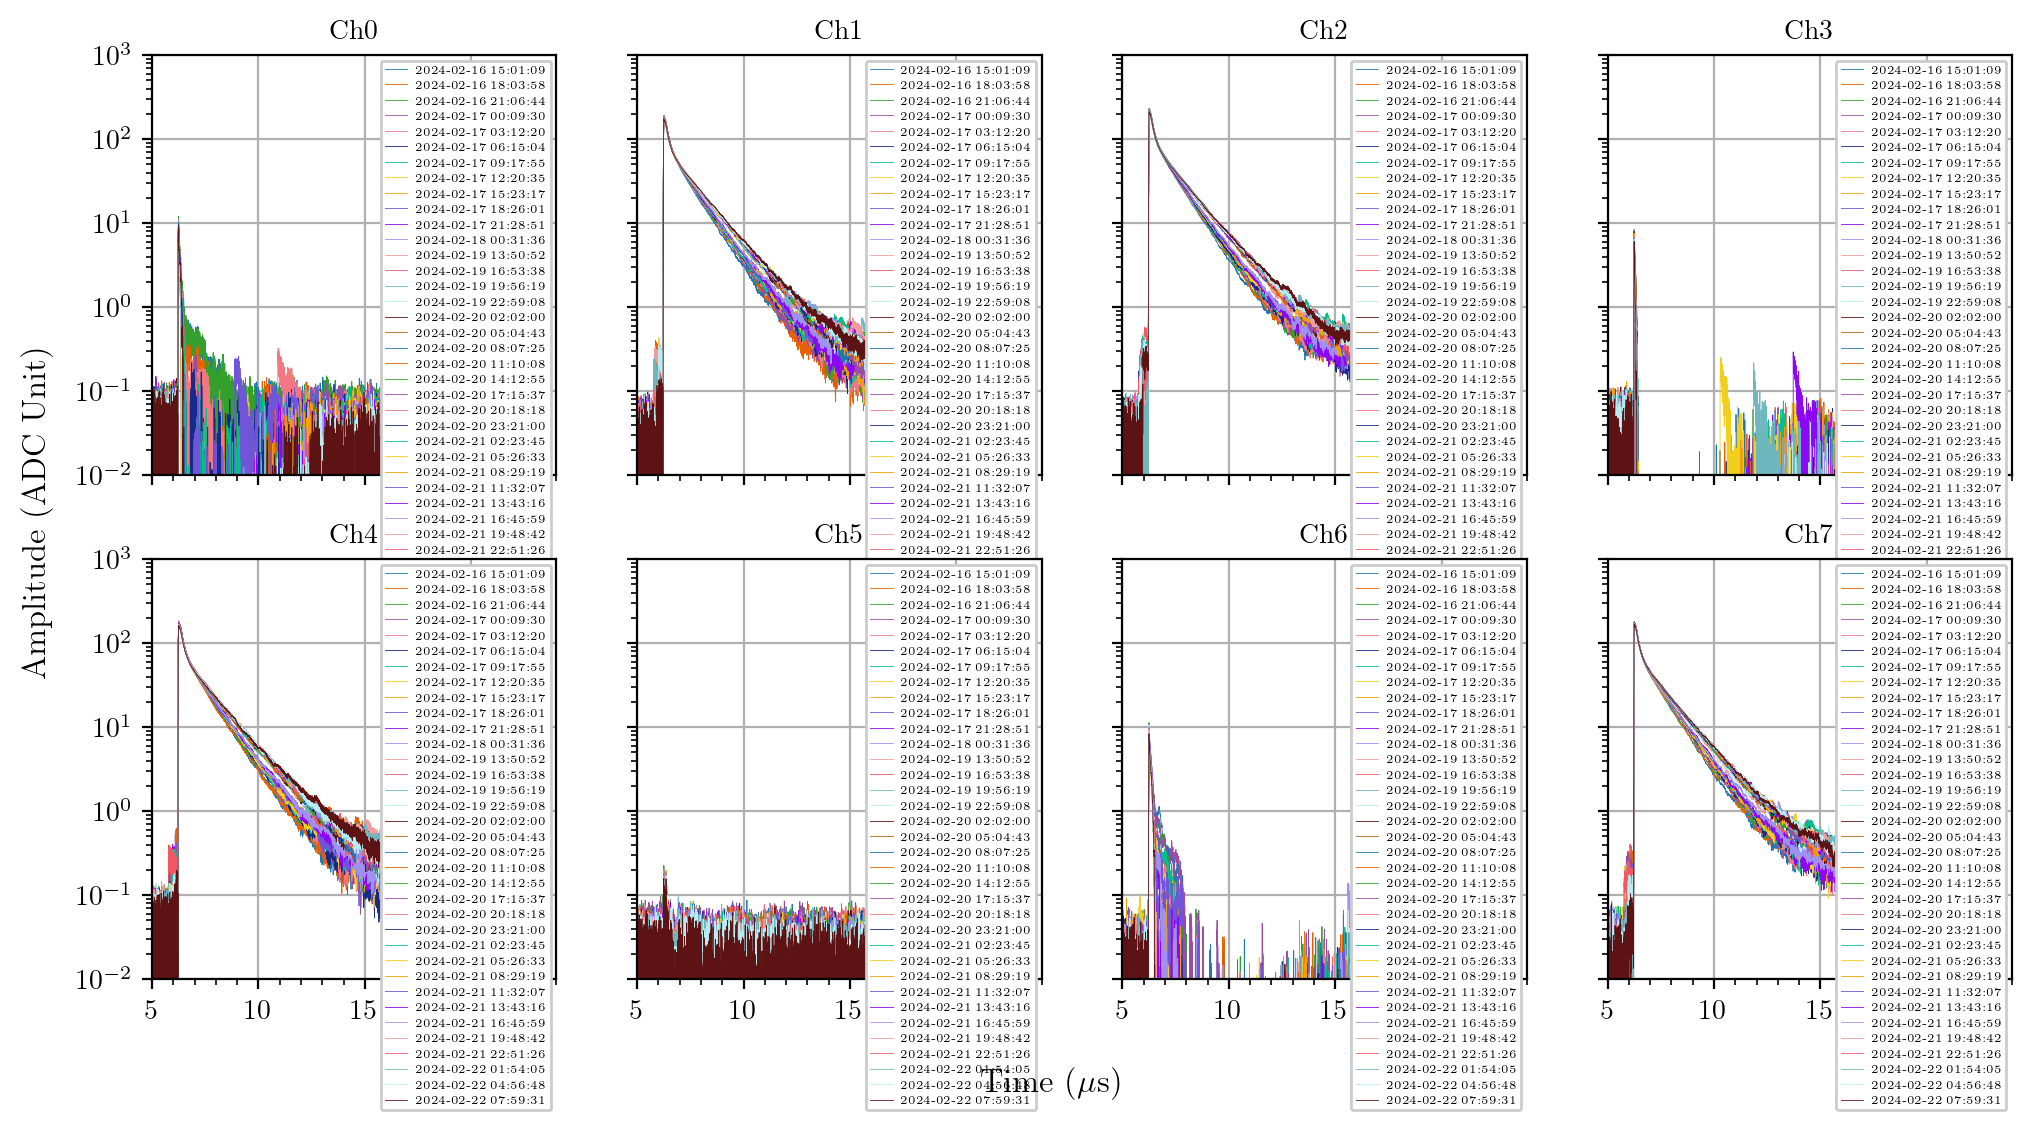

In [10]:
# Make plots for all datasets
# Average LAr scintillation waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, f in enumerate(files):
        print(f'{date_time[f]} ch{ch} {data_scint[f][ch]["n_scint_wfs"]:.0f} waveforms selected')
        axs[j//4, j%4].plot(
            data_scint[f][ch]['time'],
            data_scint[f][ch]['avg_scint_wf'],
            label=f'{date_time[f]}', color=f'C{k}', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right',fontsize=4)
    axs[j//4, j%4].set_xlim(5, 24)
    axs[j//4, j%4].set_ylim(1e-2, 1e3)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## Deconvolution

In [11]:
# Deconvolution channel by channel
ch_old = [0,5,6,3,4,1,2,7]
for i, f in enumerate(files):
    for j, ch in enumerate(channels):
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch_old[ch]]['n_spe_wfs']>0:
            dt = data_spe[ch_old[ch]]['time'][1]-data_spe[ch_old[ch]]['time'][0]
            shift = np.array([np.exp(complex(0,-2*np.pi*freq*dt*int(data_spe[ch_old[ch]]['pars'][3]/dt))) for freq in data_spe[ch_old[ch]]['frequency']])
            data_scint[f][ch]['deconv'] = ifft(fft(data_scint[f][ch]['avg_scint_wf'])/data_spe[ch_old[ch]]['fft_spe_wf']*shift).real

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

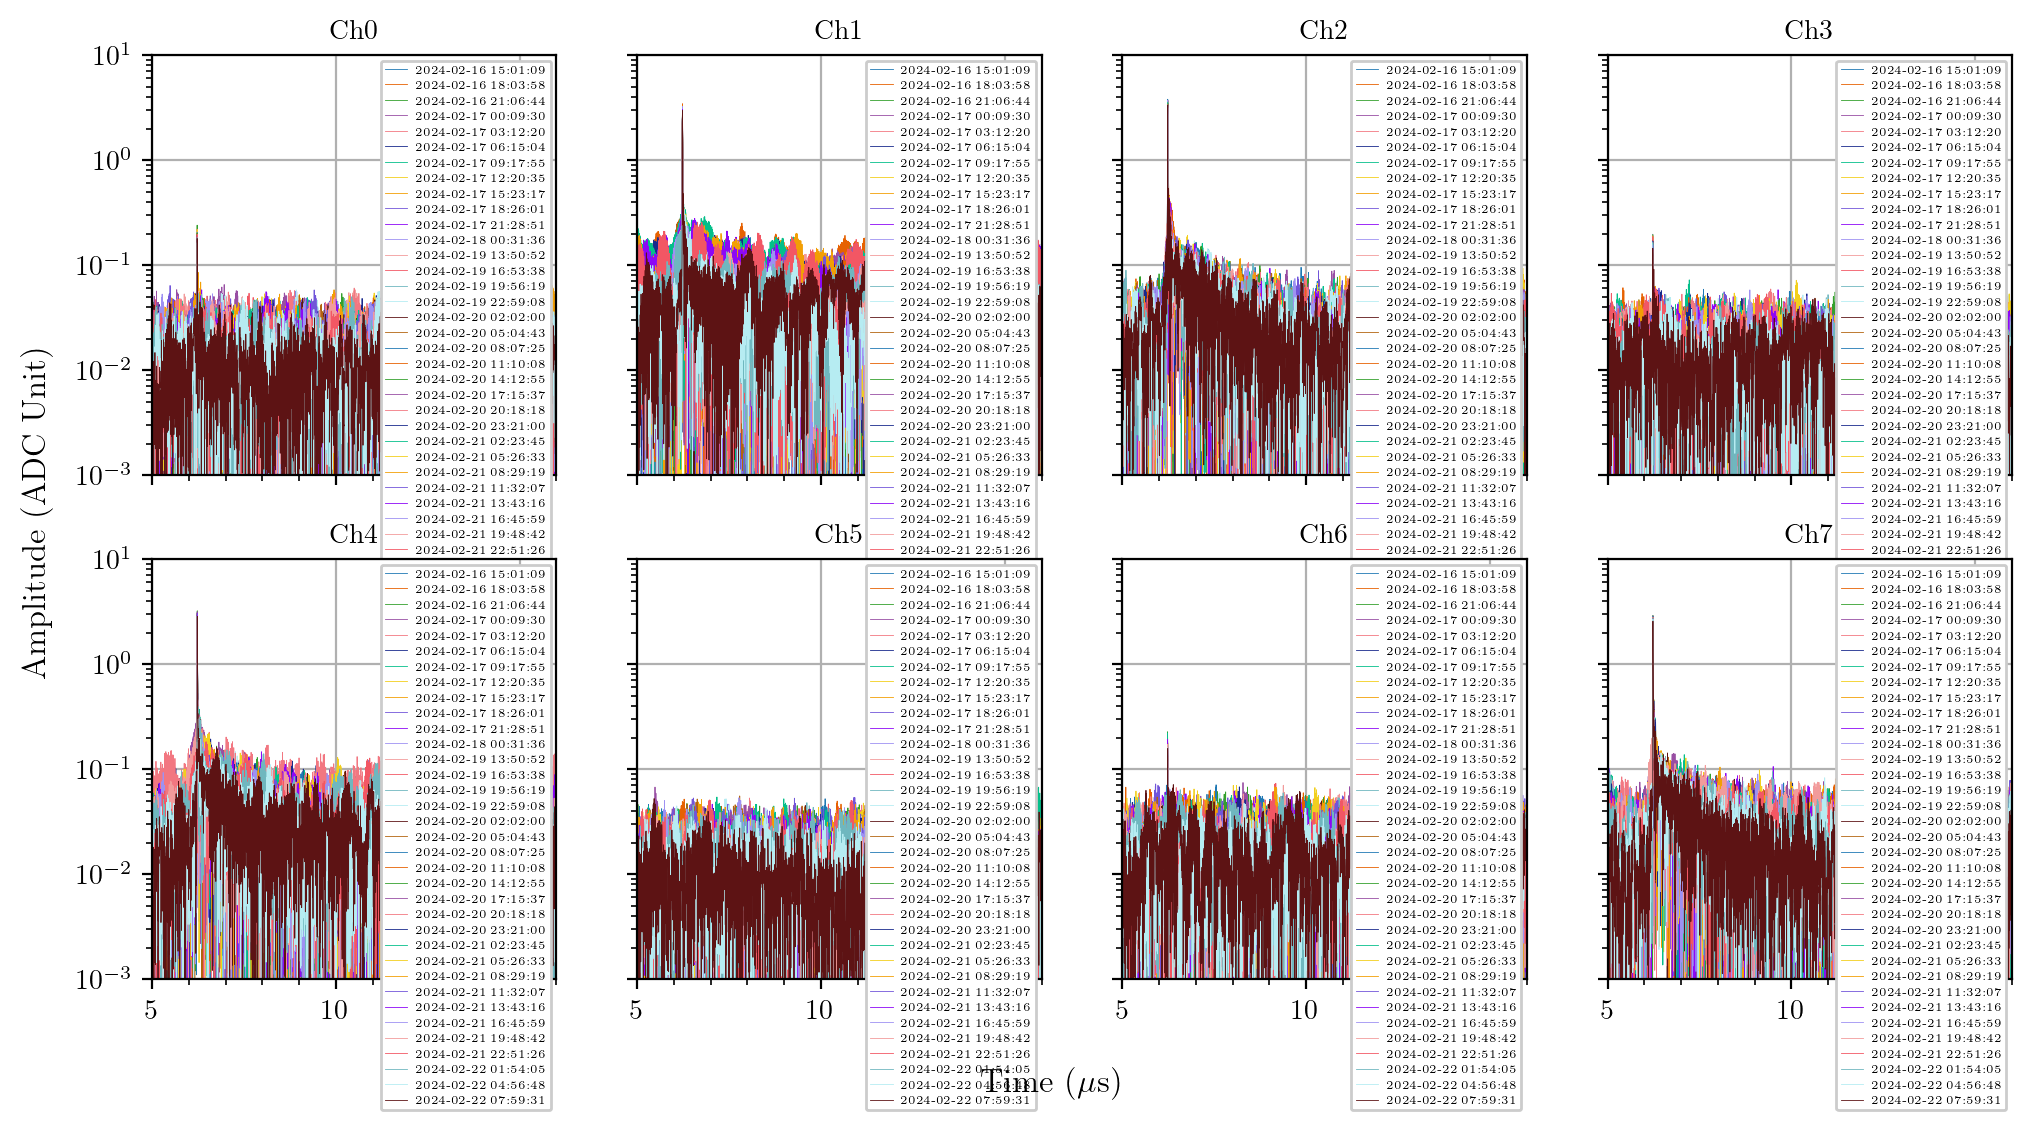

In [12]:
# Make plots for all datasets
# Deconvolved scintillation waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, f in enumerate(files):
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            axs[j//4, j%4].plot(
                data_scint[f][ch]['time'],
                abs(data_scint[f][ch]['deconv']),
                label=f'{date_time[f]}', color=f'C{k}', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right', fontsize=4)
    axs[j//4, j%4].set_xlim(5, 16)
    axs[j//4, j%4].set_ylim(1e-3, 1e1)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## Summation
Only sum CH4-7 (without fused silica windows)

In [13]:
for f in files:
    data_scint[f][-1] = {'time': data_scint[f][0]['time'], 'sum_wf': np.zeros(data_scint[f][0]['time'].shape[0])}
    for ch in channels[-4:]:
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            data_scint[f][-1]['sum_wf'] += data_scint[f][ch]['deconv']

Text(0.02, 0.5, 'Amplitude (ADC Unit)')

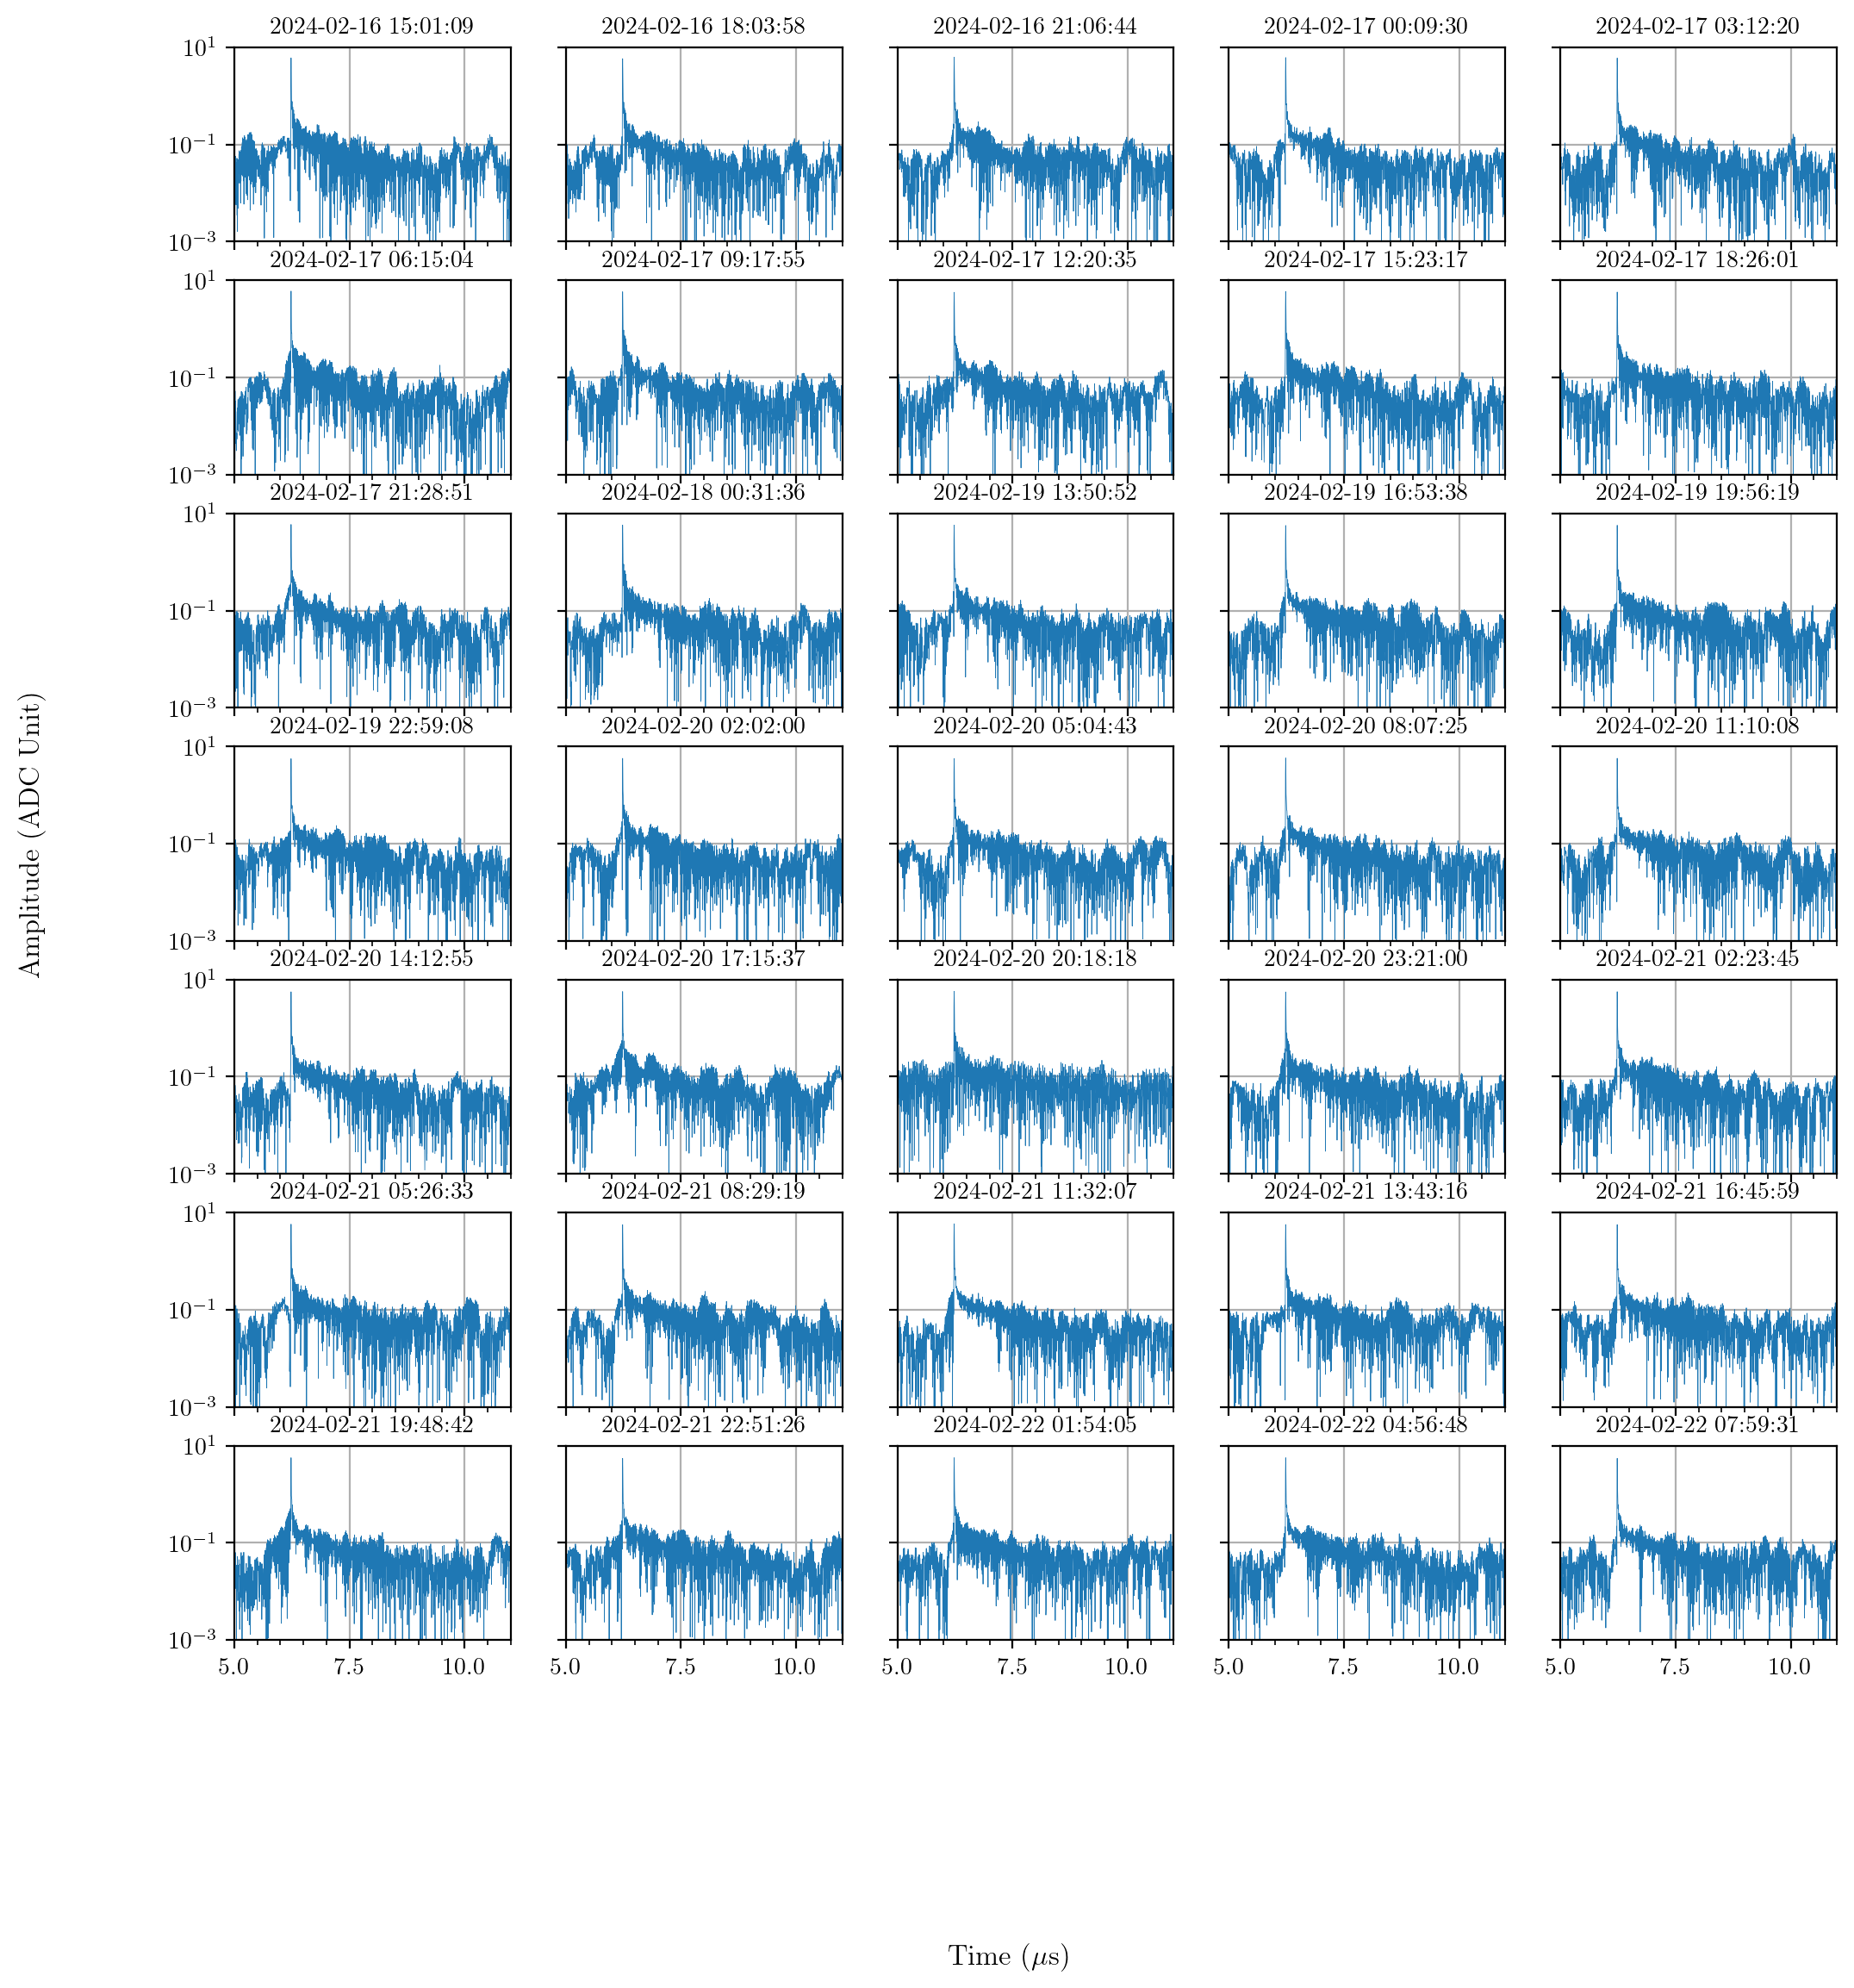

In [14]:
# Make plots for all datasets
# Summed scintillation waveform
fig, axs = plt.subplots(7, 5, sharex=True, sharey=True)
fig.set_size_inches(12, 12)
for i, f in enumerate(files):
    axs[i//5, i%5].plot(
                data_scint[f][-1]['time'],
                abs(data_scint[f][-1]['sum_wf']),
                linewidth=0.3)
    axs[i//5, i%5].set_xlim(5, 11)
    axs[i//5, i%5].set_ylim(1e-3, 1e1)
    axs[i//5, i%5].set_yscale('log')
    axs[i//5, i%5].minorticks_on()
    axs[i//5, i%5].grid()
    axs[i//5, i%5].set_title(f'{date_time[f]}')
fig.supxlabel(r'Time ($\mu$s)', y=-0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.02)

In [15]:
def subsample(input_t,input_wf,nsub):
    ntot = int(input_t.shape[0]//nsub * nsub)
    new_t, new_wf = np.zeros(ntot//nsub), np.zeros(ntot//nsub)
    for i in range(nsub):
        new_t += input_t[i:ntot:nsub]
        new_wf += input_wf[i:ntot:nsub]
    new_t /= nsub
    new_wf /= nsub
    return new_t, new_wf

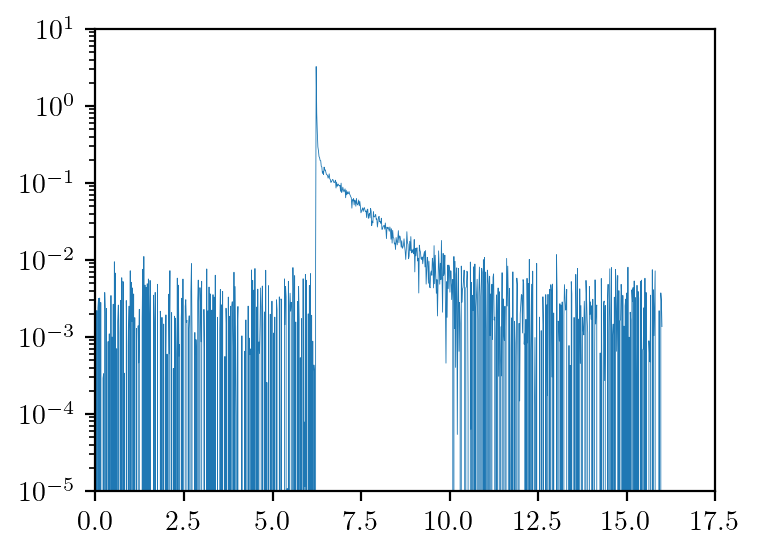

In [16]:
newt, newwf = subsample(data_scint[files[0]][-1]['time'],data_scint[files[0]][-1]['sum_wf'],4)
plt.plot(
    newt,
    newwf,linewidth=0.3)
plt.yscale('log')
# plt.xlim(5.5,10)

## Fitting

In [17]:
def template2(t, a_1, tau_1, a_2, tau_2, sigma, t0):
        return func.pulse_jitter(t, a_1, tau_1, sigma, t0) + func.pulse_jitter(t, a_2, tau_2, sigma, t0)

In [22]:
# Fit SPE average waveform
nsub = 4
data_sub = {}
for f in files:
    if data_scint[f][-1]['sum_wf'].shape[0]>0:
        sub_t,sub_wf = subsample(data_scint[f][-1]['time'],data_scint[f][-1]['sum_wf'],nsub)
        data_sub[f] = {-1:{'time':sub_t,'sum_wf':sub_wf}}
        pretrg = 5 #us
        fit_range = [6.2, 10] #us
        # err = np.std(data_scint[f][-1]['sum_wf'][data_scint[f][-1]['time']<pretrg])
        # range_arr = (data_scint[f][-1]['time']<fit_range[1]) & (data_scint[f][-1]['time']>fit_range[0])
        # popt,pcov = curve_fit(
        #     template2,
        #     data_scint[f][-1]['time'][range_arr], 
        #     data_scint[f][-1]['sum_wf'][range_arr], 
        #     p0=[5, 0.02, 0.5, 0.8, 0.003, 6.23], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
        err = np.std(data_sub[f][-1]['sum_wf'][data_sub[f][-1]['time']<pretrg])
        range_arr = (data_sub[f][-1]['time']<fit_range[1]) & (data_sub[f][-1]['time']>fit_range[0])
        popt,pcov = curve_fit(
            template2,
            data_sub[f][-1]['time'][range_arr], 
            data_sub[f][-1]['sum_wf'][range_arr], 
            p0=[5, 0.02, 0.5, 0.8, 0.003, 6.23], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
        data_scint[f][-1]['pars'] = popt
        data_scint[f][-1]['cov'] = pcov
        print(f'{date_time[f]} As={popt[0]} Ts={popt[1]}us At={popt[2]} Tt={popt[3]}us sigma={popt[4]}us t0={popt[5]}us')

2024-02-16 15:01:09 As=4.4767489789292485 Ts=0.010504824128270822us At=0.2070916687345514 Tt=0.8590249464689844us sigma=9.773286772793741e-05us t0=6.225918370111099us
2024-02-16 18:03:58 As=7.3804617255580975 Ts=0.011024794011546171us At=0.2027798233711079 Tt=0.8751227841784747us sigma=0.0018143869110071895us t0=6.219395099283493us
2024-02-16 21:06:44 As=4.43497180861909 Ts=0.010585968204474902us At=0.20856019621112462 Tt=0.8812798916387748us sigma=0.0003717568629917933us t0=6.225720501876125us
2024-02-17 00:09:30 As=4.363207842397054 Ts=0.010550793999269769us At=0.20437058888235485 Tt=0.9144491184329973us sigma=2.622328597989065e-05us t0=6.22619246684476us
2024-02-17 03:12:20 As=4.31193807704803 Ts=0.011090700606964734us At=0.20665093766371131 Tt=0.9166589203426277us sigma=0.0007147095491228001us t0=6.225766481750558us
2024-02-17 06:15:04 As=3.2416153830384338 Ts=0.010358645332176442us At=0.19785116777200795 Tt=0.946689174422578us sigma=7.771393581172505e-05us t0=6.229242665905885us
2

/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: invalid value encountered in multiply
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


Text(-0.01, 0.5, 'Amplitude (ADC Unit)')

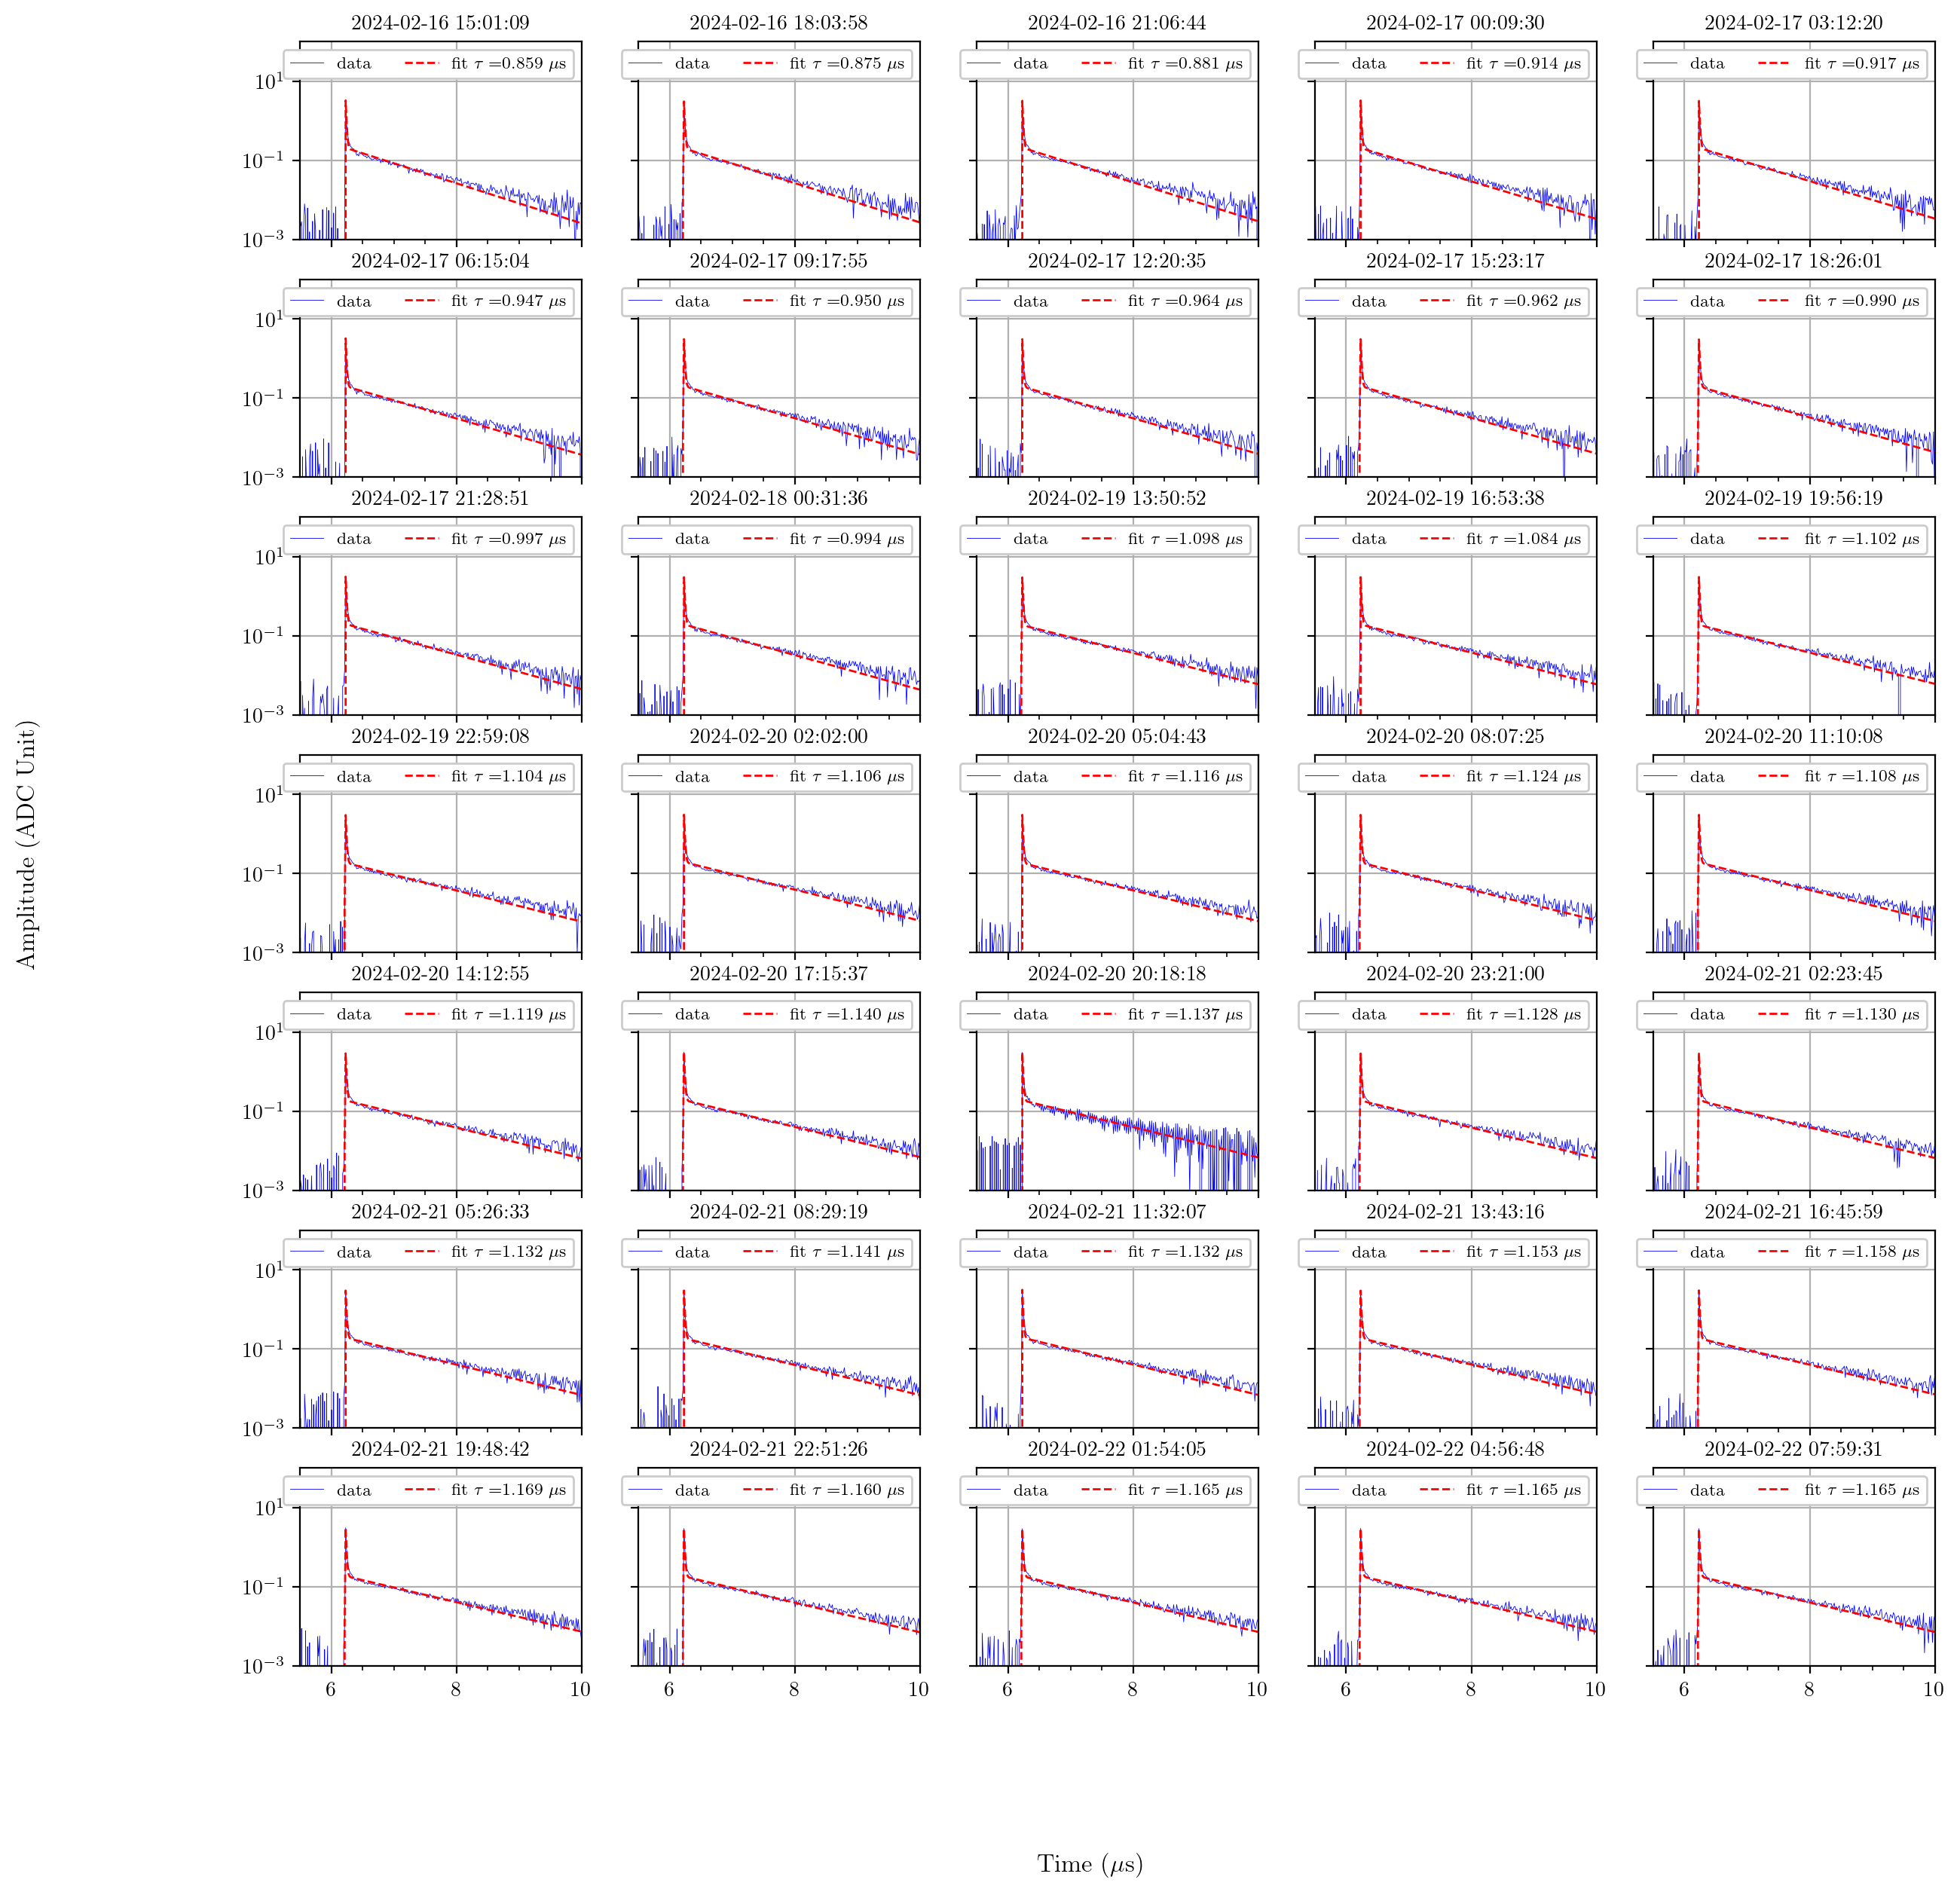

In [23]:
# Make plots for all datasets
# Fitted SPE average waveform
fig, axs = plt.subplots(7, 5, sharex=True, sharey=True)
fig.set_size_inches(14, 14)
for i, f in enumerate(files):
    if data_scint[f][-1]['sum_wf'].shape[0]>0:
        axs[i//5, i%5].plot(
            data_sub[f][-1]['time'],
            data_sub[f][-1]['sum_wf'],
            label=f'data', color='b', linewidth=0.3)
        axs[i//5, i%5].plot(
            data_sub[f][-1]['time'],
            template2(data_sub[f][-1]['time'], *data_scint[f][-1]['pars']),
            label=r'fit $\tau=${:.3f} $\mu $s'.format(data_scint[f][-1]['pars'][3]), color='r', linestyle='--', linewidth=1)
        axs[i//5, i%5].legend(loc='upper right',ncol=2)
        axs[i//5, i%5].set_xlim(5.5, 10)
        axs[i//5, i%5].set_ylim(1e-3, 1e2)
        axs[i//5, i%5].set_yscale('log')
        axs[i//5, i%5].minorticks_on()
        axs[i//5, i%5].grid()
        axs[i//5, i%5].set_title(f'{date_time[f]}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=-0.01)

# Triplet lifetime evolution

Get folder paths and days since the getter was turned on

In [24]:
dt_getter = datetime(2024,2,14,15,0,0)
print('The getter was turned on at', dt_getter)

The getter was turned on at 2024-02-14 15:00:00


In [25]:
files_all = files

In [26]:
# Sort datasets
S_PER_DAY = 86400
directory = '/scratch/gpfs/as111/results/'
positions = ['top','bottom']
datetime_files = {}
for f in files_all:
    df = pd.read_hdf(f, key=f'98/-1')
    date_time = datetime(*np.array(df['start_datetime']).astype(int))
    days = (date_time-dt_getter).total_seconds()/S_PER_DAY
    datetime_files[days] = f
sorted_keys = list(datetime_files.keys())
sorted_keys.sort()

In [27]:
data_triplet = []
channels = np.arange(8)
nsub = 4
for sorted_day in sorted_keys:
    file = datetime_files[sorted_day]
    # Create a new dataset if >30mins apart from the last one
    if len(data_triplet)==0 or sorted_day-data_triplet[-1]['days']>1/48: 
        data_triplet.append({
            'days': sorted_day, 
            'filename': [file], 
            'data':{}
        })
        for ch in channels:
            data_triplet[-1]['data'][ch] = {'n_scint_wfs':0, 'avg_scint_wf':np.zeros(0), 'time':np.zeros(0)}
    else:
        data_triplet[-1]['filename'].append(file)
# Load data    
for d in data_triplet:
    for ch in channels:
        for f in d['filename']:
            df = pd.read_hdf(f, key=f'98/{ch}')
            d['data'][ch]['n_scint_wfs'] += np.array(df['n_scint_wfs'])[0]
            if d['data'][ch]['time'].shape[0]==0:
                d['data'][ch]['time'] = np.array(df['time'].dropna())
            if d['data'][ch]['avg_scint_wf'].shape[0]==0:
                d['data'][ch]['avg_scint_wf'] = np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
            else:
                d['data'][ch]['avg_scint_wf'] += np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
            df = None # Clear memory
        d['data'][ch]['avg_scint_wf'] /= d['data'][ch]['n_scint_wfs']
        # Deconvolution
        dt = data_spe[ch]['time'][1]-data_spe[ch]['time'][0]
        shift = np.array([np.exp(complex(0,-2*np.pi*freq*dt*int(data_spe[ch]['pars'][3]/dt))) for freq in data_spe[ch]['frequency']])
        d['data'][ch]['deconv'] = ifft(fft(d['data'][ch]['avg_scint_wf'])/data_spe[ch]['fft_spe_wf']*shift).real
    # Summation
    d['data'][-1] = {'time': d['data'][0]['time'], 'sum_wf': np.zeros(d['data'][0]['time'].shape[0])}
    for ch in channels:
        d['data'][-1]['sum_wf'] += d['data'][ch]['deconv']
    # Fitting
    sub_t,sub_wf = subsample(d['data'][-1]['time'],d['data'][-1]['sum_wf'],nsub)
    pretrg = 5 #us
    fit_range = [5.5,10] #us
    err = np.std(sub_wf[sub_t<pretrg])
    range_arr = (sub_t<fit_range[1])&(sub_t>fit_range[0])
    popt,pcov = curve_fit(
        template2,
        sub_t[range_arr], 
        sub_wf[range_arr], 
        p0=[5, 0.02, 0.5, 0.8, 0.003, 6.23], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
    d['data'][-1]['pars'] = popt
    d['data'][-1]['cov'] = pcov
    print(f'{d["days"]*24:.2f} hours As={popt[0]:.3f} Ts={popt[1]:.5f}us At={popt[2]:.5f} Tt={popt[3]:.3f}us sigma={popt[4]:.5f}us t0={popt[5]:.4f}us')

/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


48.02 hours As=6.930 Ts=0.00948us At=0.40038 Tt=0.871us sigma=0.00008us t0=6.2293us
51.07 hours As=6.659 Ts=0.00997us At=0.39890 Tt=0.888us sigma=0.00010us t0=6.2292us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


54.11 hours As=6.861 Ts=0.00970us At=0.39829 Tt=0.906us sigma=0.00010us t0=6.2291us
57.16 hours As=6.772 Ts=0.00971us At=0.39767 Tt=0.921us sigma=0.00009us t0=6.2293us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


60.21 hours As=6.775 Ts=0.00991us At=0.39462 Tt=0.933us sigma=0.00011us t0=6.2291us
63.25 hours As=6.733 Ts=0.00964us At=0.38639 Tt=0.958us sigma=0.00004us t0=6.2293us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


66.30 hours As=6.751 Ts=0.00968us At=0.38653 Tt=0.973us sigma=0.00002us t0=6.2293us
69.34 hours As=6.790 Ts=0.00965us At=0.38436 Tt=0.986us sigma=0.00011us t0=6.2292us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


72.39 hours As=6.750 Ts=0.00962us At=0.38621 Tt=0.983us sigma=0.00007us t0=6.2291us
75.43 hours As=6.624 Ts=0.01005us At=0.38445 Tt=0.996us sigma=0.00006us t0=6.2291us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


78.48 hours As=6.582 Ts=0.00998us At=0.38320 Tt=1.005us sigma=0.00007us t0=6.2291us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


81.53 hours As=6.538 Ts=0.00992us At=0.37779 Tt=1.015us sigma=0.00004us t0=6.2293us
118.85 hours As=6.488 Ts=0.00983us At=0.36667 Tt=1.105us sigma=0.00013us t0=6.2291us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


121.89 hours As=6.534 Ts=0.00986us At=0.37627 Tt=1.103us sigma=0.00004us t0=6.2292us
124.94 hours As=6.322 Ts=0.00952us At=0.36377 Tt=1.119us sigma=0.00002us t0=6.2296us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


127.99 hours As=6.347 Ts=0.00982us At=0.35743 Tt=1.126us sigma=0.00003us t0=6.2294us
131.03 hours As=6.498 Ts=0.01008us At=0.37214 Tt=1.127us sigma=0.00007us t0=6.2292us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


134.08 hours As=6.496 Ts=0.00965us At=0.35700 Tt=1.136us sigma=0.00002us t0=6.2293us
137.12 hours As=6.343 Ts=0.00997us At=0.36230 Tt=1.136us sigma=0.00006us t0=6.2291us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


140.17 hours As=6.435 Ts=0.00977us At=0.36373 Tt=1.135us sigma=0.00009us t0=6.2293us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


143.22 hours As=6.369 Ts=0.00992us At=0.36018 Tt=1.147us sigma=0.00009us t0=6.2292us
146.26 hours As=6.521 Ts=0.00965us At=0.36076 Tt=1.155us sigma=0.00013us t0=6.2291us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/miniconda3/envs/sipm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


149.31 hours As=6.421 Ts=0.00968us At=0.36446 Tt=1.153us sigma=0.00000us t0=6.2294us
152.35 hours As=6.311 Ts=0.00994us At=0.35774 Tt=1.150us sigma=0.00000us t0=6.2290us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


155.40 hours As=6.403 Ts=0.00987us At=0.36455 Tt=1.150us sigma=0.00014us t0=6.2291us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


158.44 hours As=6.328 Ts=0.00993us At=0.36423 Tt=1.148us sigma=0.00004us t0=6.2292us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


161.49 hours As=6.522 Ts=0.00978us At=0.35926 Tt=1.163us sigma=0.00000us t0=6.2291us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


164.54 hours As=6.536 Ts=0.00966us At=0.36832 Tt=1.156us sigma=0.00010us t0=6.2292us
166.72 hours As=6.267 Ts=0.01009us At=0.35719 Tt=1.168us sigma=0.00005us t0=6.2292us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


169.77 hours As=6.462 Ts=0.00953us At=0.35783 Tt=1.170us sigma=0.00005us t0=6.2293us
172.81 hours As=6.449 Ts=0.00970us At=0.35262 Tt=1.182us sigma=0.00008us t0=6.2292us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/miniconda3/envs/sipm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


175.86 hours As=6.220 Ts=0.00995us At=0.35692 Tt=1.170us sigma=0.00008us t0=6.2293us
178.90 hours As=6.253 Ts=0.01002us At=0.35362 Tt=1.180us sigma=0.00000us t0=6.2291us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


181.95 hours As=6.226 Ts=0.01001us At=0.35333 Tt=1.179us sigma=0.00011us t0=6.2291us
184.99 hours As=6.488 Ts=0.00978us At=0.34992 Tt=1.193us sigma=0.00006us t0=6.2290us


/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


In [28]:
# Fit result container
# Initialize
triplet_fit = {}

In [29]:
triplet_fit = {}
triplet_fit['days'] = np.array([d['days'] for d in data_triplet])
triplet_fit['a1'] = np.array([d['data'][-1]['pars'][0] for d in data_triplet])
triplet_fit['tau1'] = np.array([d['data'][-1]['pars'][1] for d in data_triplet])
triplet_fit['a2'] = np.array([d['data'][-1]['pars'][2] for d in data_triplet])
triplet_fit['tau2'] = np.array([d['data'][-1]['pars'][3] for d in data_triplet])
triplet_fit['a1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][0, 0]) for d in data_triplet])
triplet_fit['tau1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][1, 1]) for d in data_triplet])
triplet_fit['a2err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][2, 2]) for d in data_triplet])
triplet_fit['tau2err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][3, 3]) for d in data_triplet])

In [30]:
print(triplet_fit['tau2'])

[0.87135972 0.88808555 0.90640945 0.92136686 0.93348535 0.95773074
 0.97337348 0.98584582 0.98341261 0.99591207 1.00456673 1.01504221
 1.1046036  1.10347822 1.11925511 1.12576076 1.12693768 1.13568819
 1.13609263 1.13541376 1.14668381 1.15457811 1.15270395 1.15014316
 1.15003425 1.14785504 1.16286777 1.15623637 1.16846094 1.16962422
 1.18229029 1.17033896 1.1804613  1.17938869 1.19255717]


Text(0.5, 0.01, 'Hours since getter on')

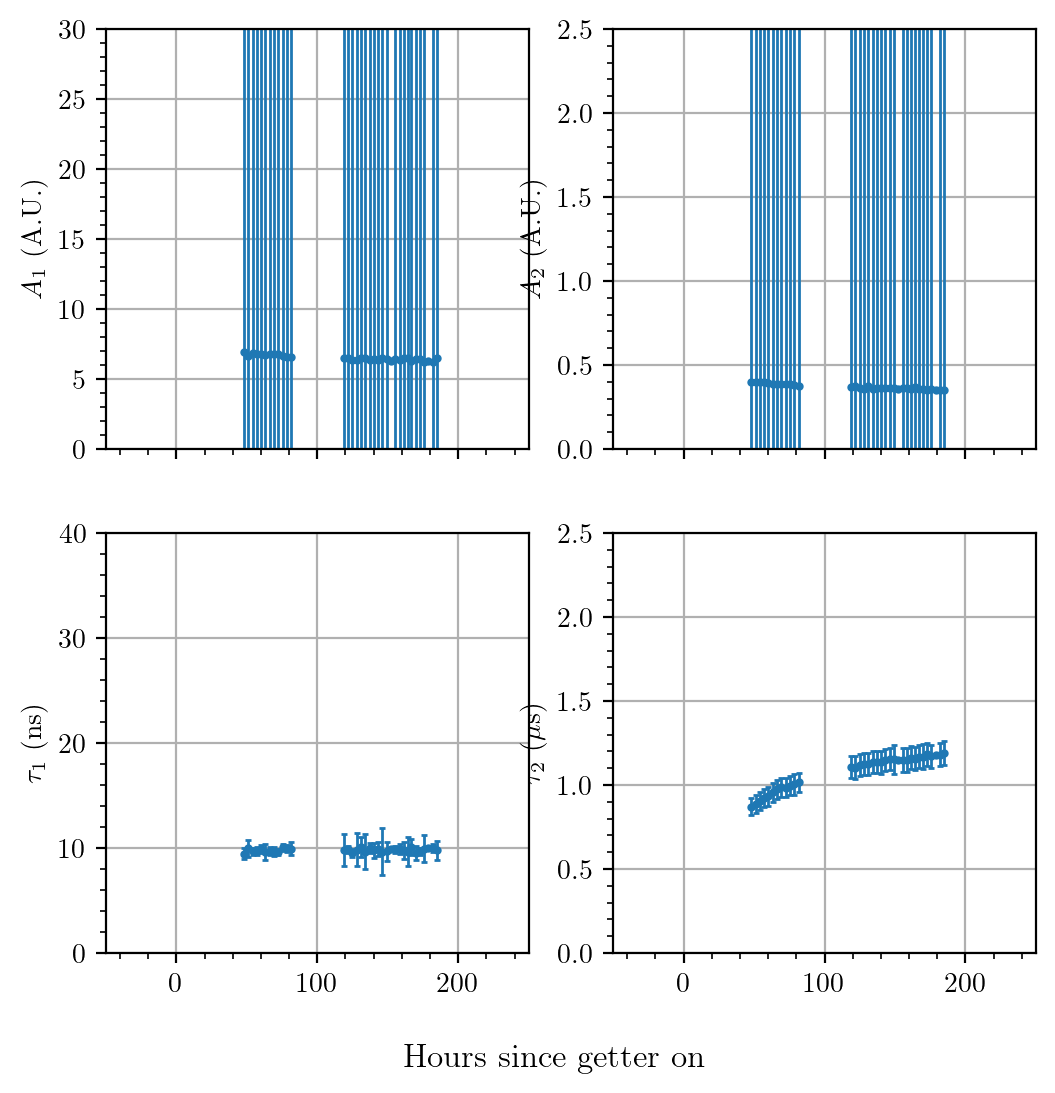

In [31]:
# Make plots for all parameters
# Triplet evolution
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)
fig.set_size_inches(6, 6)

axs[0, 0].errorbar(
    triplet_fit['days']*24,
    triplet_fit['a1'],
    yerr=triplet_fit['a1err'],
    label=f'98V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[0, 0].set_ylabel(r'$A_1$ (A.U.)')
axs[0, 0].set_ylim(0,30)

axs[0, 1].errorbar(
    triplet_fit['days']*24,
    triplet_fit['a2'],
    yerr=triplet_fit['a2err'],
    label=f'98V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[0, 1].set_ylabel(r'$A_2$ (A.U.)')
axs[0, 1].set_ylim(0,2.5)

axs[1, 0].errorbar(
    triplet_fit['days']*24,
    triplet_fit['tau1']*1e3,
    yerr=triplet_fit['tau1err']*1e3,
    label=f'98V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[1, 0].set_ylabel(r'$\tau_1$ (ns)')
axs[1, 0].set_ylim(0,40)

axs[1, 1].errorbar(
    triplet_fit['days']*24,
    triplet_fit['tau2'],
    yerr=triplet_fit['tau2err'],
    label=f'98V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[1, 1].set_ylabel(r'$\tau_2$ ($\mu$s)')
axs[1, 1].set_ylim(0,2.5)

for i in range(2):
    for j in range(2):
        # axs[i, j].legend(loc='upper right',fontsize=6)
        axs[i, j].minorticks_on()
        axs[i, j].grid()
        axs[i, j].set_xlim(-50,250)
fig.supxlabel('Hours since getter on')